# Data Model Usage
Load and look at various data objects.

### Table of Contents <a id=toc>
* [Imports and setup](#init)
* [Create Net](#createnet)
* [CM from Net](#cm)
* [Create TransProb](#createtp) (TPM)
* [Create States](#createstates) Methods for maniulating states. Does not contain all states.

## Imports and setup <a id=init>

In [1]:
import numpy as np
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
from collections import Counter
import functools, operator
import networkx as nx

import pyphi.data_models as dm  # Prototype code

In [2]:
N = 30 # number of Nodes in system
D = 3  # Degree; average number of connections from a node to downstream nodes
S = 16 # number of States per node

p = D/N

print(f'''
{N}\t# number of Nodes
{D}\t# maximum number of Connections from a node
{S}\t# number of States per node
{p:.2f}\t# probability of edge creation for each node pairing
''')
# {labels} # node labelsb


30	# number of Nodes
3	# maximum number of Connections from a node
16	# number of States per node
0.10	# probability of edge creation for each node pairing



## Create Net <a id=createnet>

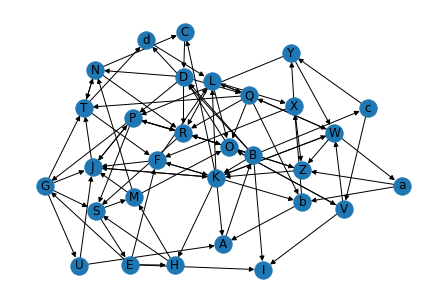

In [3]:

G = nx.gnp_random_graph(N, p, directed=True) # num_nodes, prob_edge
edges = list(G.edges())
net = dm.Net(edges=edges, SpN=S)

#Image(filename='net.png', width=500)
#nx.draw(net.graph, with_labels=True, label='gnp_random_graph({N},{p})')
net.draw()

In [4]:
print(nx.info(net.graph))
print(f'Some of the edges: {list(net.graph.edges())[:5]}...{list(net.graph.edges())[-5:]}')

Name: 
Type: DiGraph
Number of nodes: 30
Number of edges: 90
Average in degree:   3.0000
Average out degree:   3.0000
Some of the edges: [('A', 'B'), ('C', 'D'), ('E', 'F'), ('E', 'G'), ('E', 'H')]...[('Y', 'P'), ('R', 'S'), ('R', 'P'), ('Z', 'K'), ('Z', 'R')]


In [5]:
print(f'In nodes: {list(net.graph.predecessors("A"))}')
print(f'Out nodes: {list(net.graph.successors("A"))}')

In nodes: ['b', 'K', 'U']
Out nodes: ['B']


## CM from Net <a id=cm>

In [6]:
print(f'Node list = {net.node_labels}')

Node list = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd']


#### Numpy array

In [7]:
net.cm

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0

#### Pandas DataFrame

In [8]:
net.df

,A,B,C,D,E,F,G,H,I,J,...,U,V,W,X,Y,Z,a,b,c,d
A,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
C,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
E,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
G,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
H,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
J,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Pandas DataFrame of edges

In [9]:
nx.to_pandas_edgelist(net.graph)

,source,target
0,A,B
1,C,D
2,E,F
3,E,G
4,E,H
...,...,...
85,Y,P
86,R,S
87,R,P
88,Z,K


## Create TransProb (TPM) - non square<a id=createtp>

In [10]:
# Make TPM for 3 inputs, 1 ouput
probs = np.array([[0.68893508, 0.40176953],
                      [0.44095309, 0.84035902],
                      [0.09975545, 0.58225631],
                      [0.86475645, 0.18650795],
                      [0.50721989, 0.86299773],
                      [0.62045787, 0.90525779],
                      [0.88270204, 0.46225991],
                      [0.51548114, 0.89159624]])
tp = dm.TransProb(list('ABC'),list('D'),probs)
tp.df

,0,1
000,0.688935,0.401770
001,0.440953,0.840359
010,0.099755,0.582256
011,0.864756,0.186508
100,0.507220,0.862998
101,0.620458,0.905258
110,0.882702,0.462260
111,0.515481,0.891596


## Create States (and probe them) <a id=createstates>


In [11]:
states = dm.States(net)
states

#### Generate a random state
Knows about nodes so makes it the right length. Uses up to 16 states per node. Always hex digit regardless of states per node.

In [12]:
state0 = states.gen_random_state()
print(f'State as hexstr = {state0}')

State as hexstr = bba7d58697d19df9e98666f94cd64a


Compare tuple format to hex string.

In [13]:
print(f'State as tuple = {states.state_str2tuple(state0)}')

State as tuple = (11, 11, 10, 7, 13, 5, 8, 6, 9, 7, 13, 1, 9, 13, 15, 9, 14, 9, 8, 6, 6, 6, 15, 9, 4, 12, 13, 6, 4, 10)


In [14]:
print(f'{state0} \t#state0')
print(f'{states.flip_char(state0,"A", must_change=True)} \t# flip A node')
print(f'{states.flip_char(state0,"C", must_change=True)} \t# flip C node')
print(f'{states.flip_chars(state0,list("ABCD"))} \t# POTENTIALLY flip nodes A-D ')

bba7d58697d19df9e98666f94cd64a 	#state0
fba7d58697d19df9e98666f94cd64a 	# flip A node
bbe7d58697d19df9e98666f94cd64a 	# flip C node
6203d58697d19df9e98666f94cd64a 	# POTENTIALLY flip nodes A-D 


In [15]:
print(f"Tuple for state of node A = {states.node_state('A', state0)}")

Tuple for state of node A = (11,)
